In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
df=pd.read_csv("C:/Users/asr13/Downloads/DATA SET _ASS1_DAI.csv")

In [9]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [11]:
df.shape

(953, 25)

In [12]:
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
cover_url                0
dtype: int64

In [13]:
df=df.dropna()

In [14]:
df.duplicated().sum()

0

In [15]:
# 2. Visualizations - Distribution of numeric variables
numeric_columns = ['released_year', 'released_month', 'released_day', 'in_spotify_playlists', 
                   'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
                   'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
                   'instrumentalness_%', 'liveness_%', 'speechiness_%']

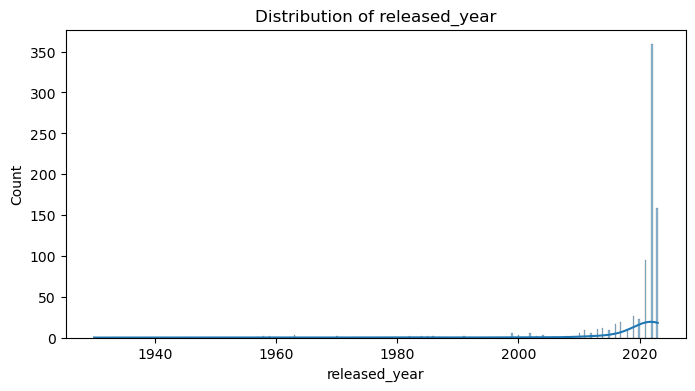

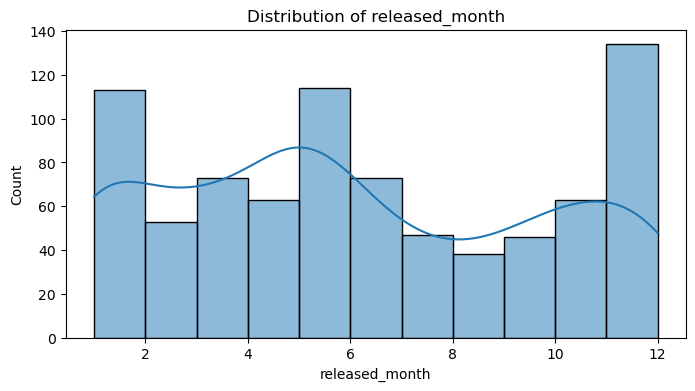

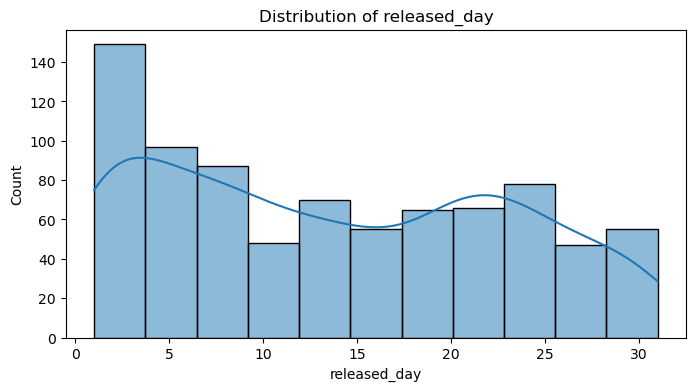

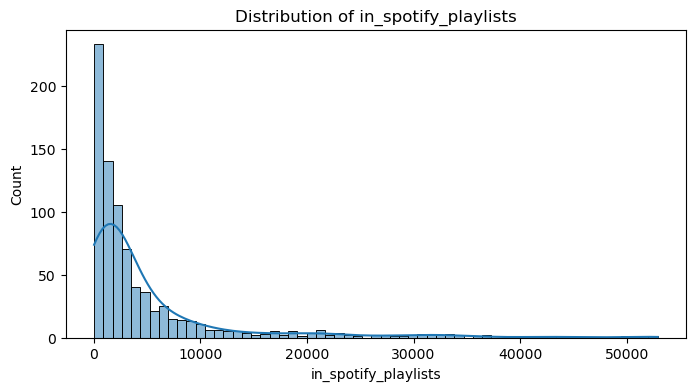

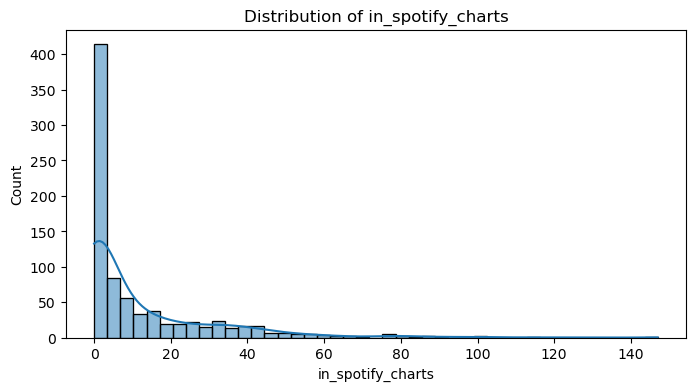

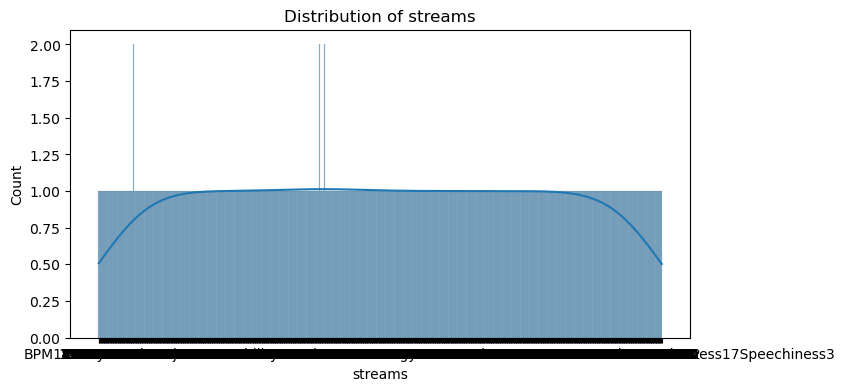

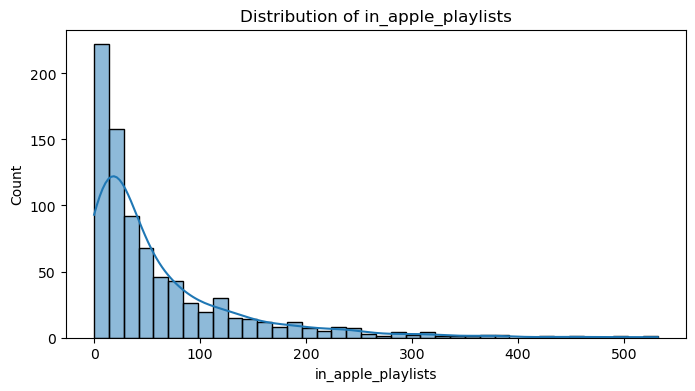

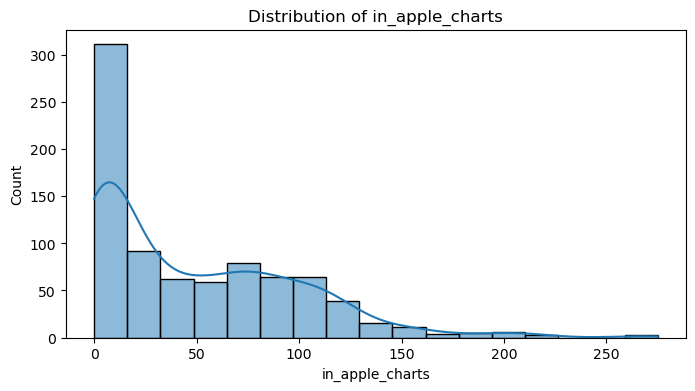

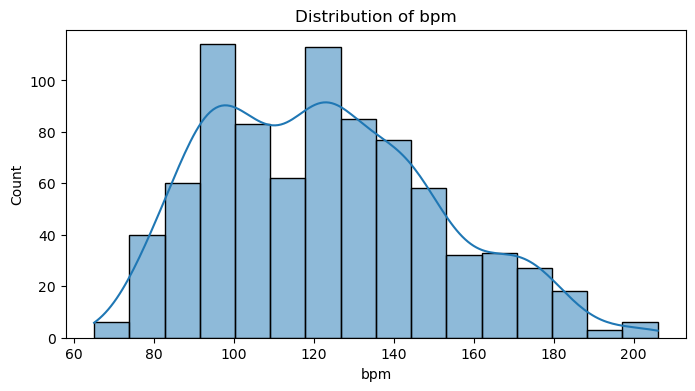

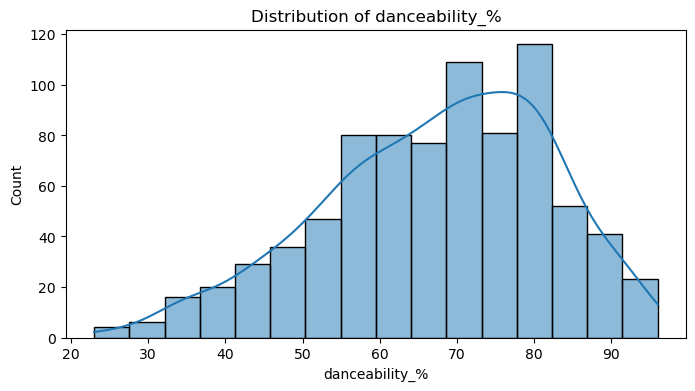

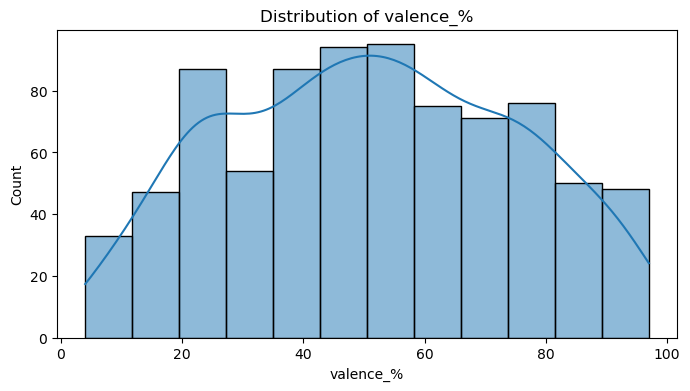

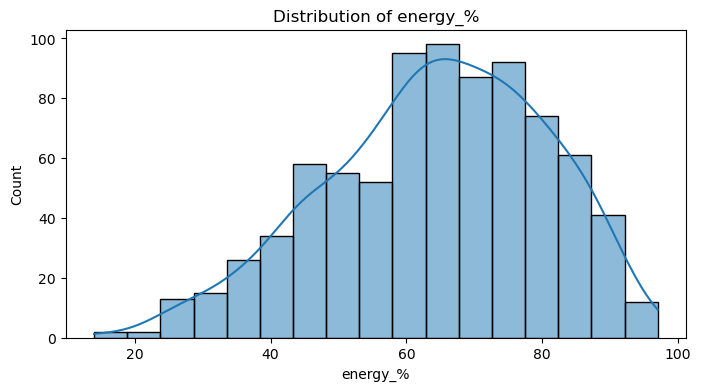

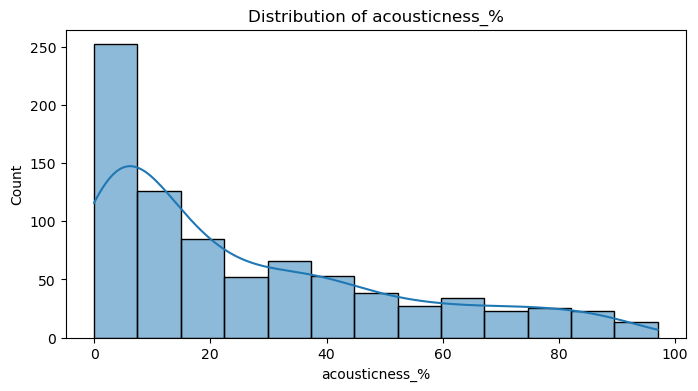

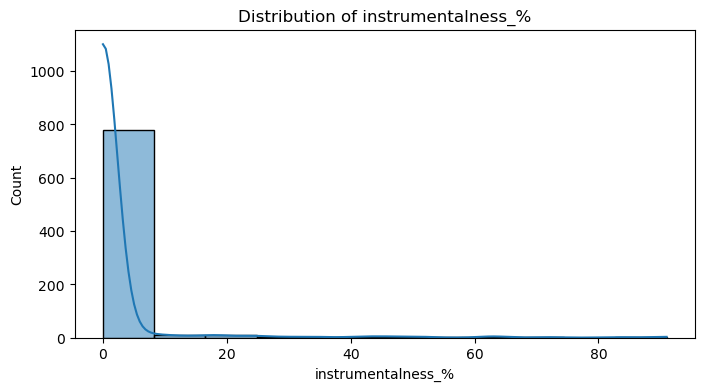

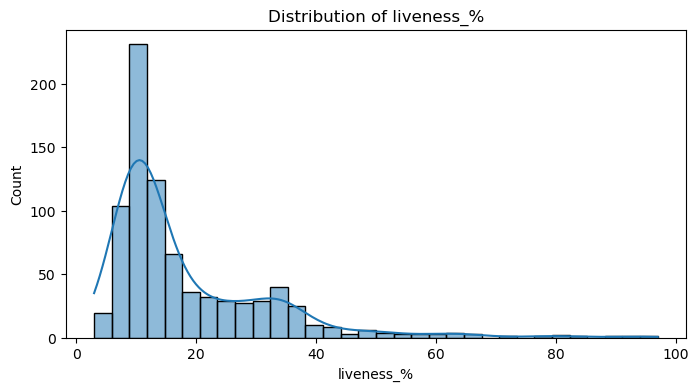

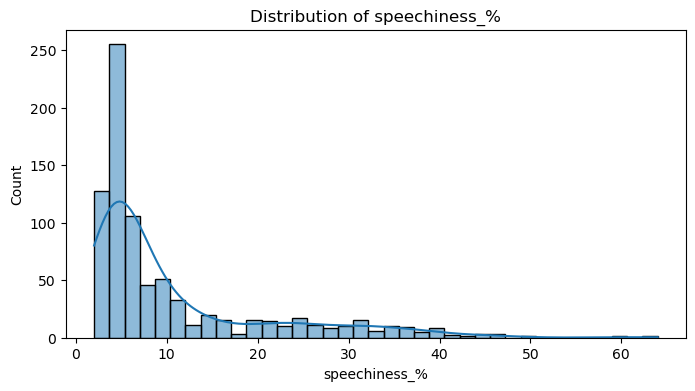

In [19]:
# Plot histograms for each numeric column
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# --- Bivariate Analysis ---

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
cover_url               object
dtype: object
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                 float64
in_apple_playlists 

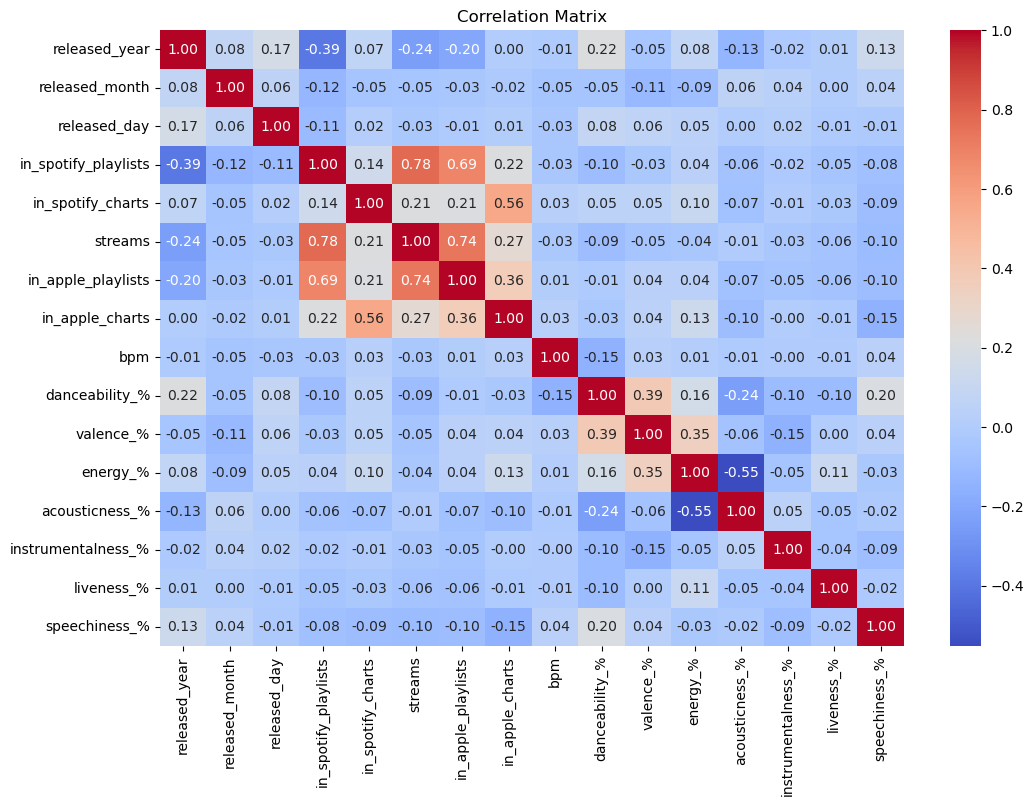

In [21]:
# 1. Check the data types of each column
print(df.dtypes)

# 2. Convert numeric columns that may have been read as strings to numeric types
#    Use errors='coerce' to convert invalid parsing to NaN
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 3. Re-check the numeric columns to ensure they are now numeric
print(df[numeric_columns].dtypes)

# 4. Drop any columns with all NaN values (if any columns couldn't be converted)
df_clean = df[numeric_columns].dropna(axis=1, how='all')

# 5. Now, you can calculate the correlation matrix
correlation = df_clean.corr()

# 6. Plot the correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

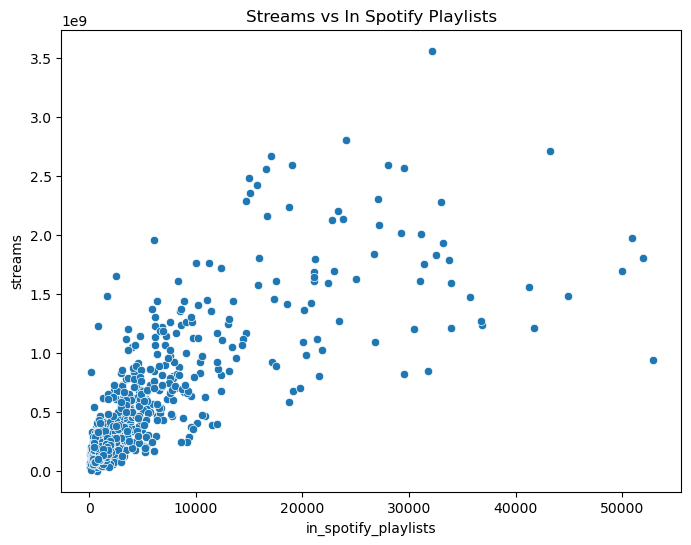

In [22]:
# 2. Scatter plot between 'streams' and 'in_spotify_playlists'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='in_spotify_playlists', y='streams', data=df)
plt.title('Streams vs In Spotify Playlists')
plt.show()

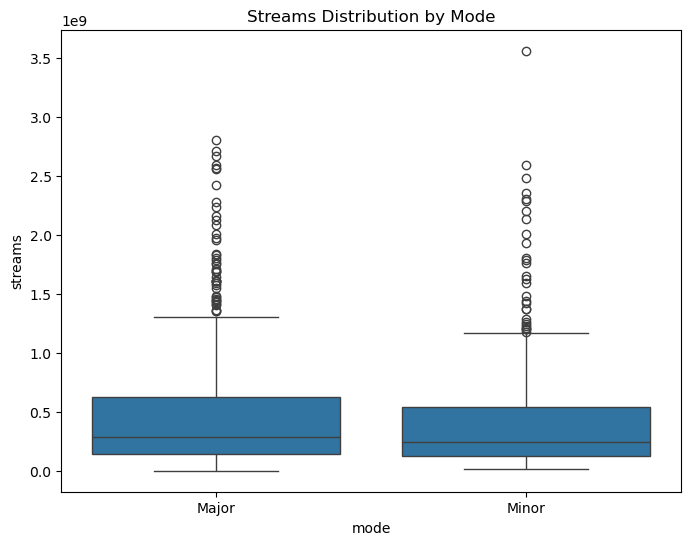

In [23]:
# 3. Box plot for 'streams' vs 'mode' (Categorical vs Numerical)
plt.figure(figsize=(8, 6))
sns.boxplot(x='mode', y='streams', data=df)
plt.title('Streams Distribution by Mode')
plt.show()


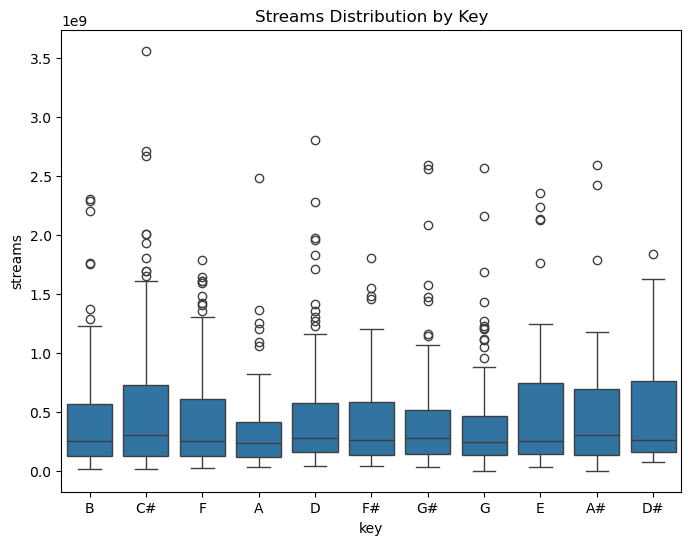

In [24]:
# 4. Box plot for 'streams' vs 'key' (Categorical vs Numerical)
plt.figure(figsize=(8, 6))
sns.boxplot(x='key', y='streams', data=df)
plt.title('Streams Distribution by Key')
plt.show()

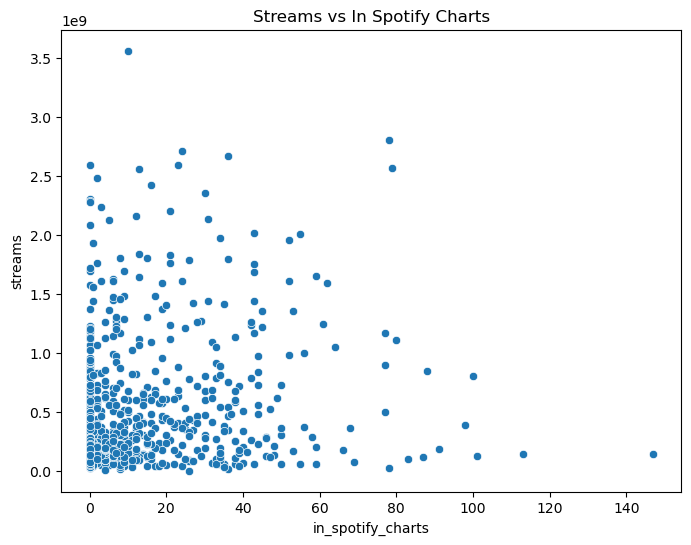

In [25]:
# 5. Additional scatter plot: 'streams' vs 'in_spotify_charts'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='in_spotify_charts', y='streams', data=df)
plt.title('Streams vs In Spotify Charts')
plt.show()

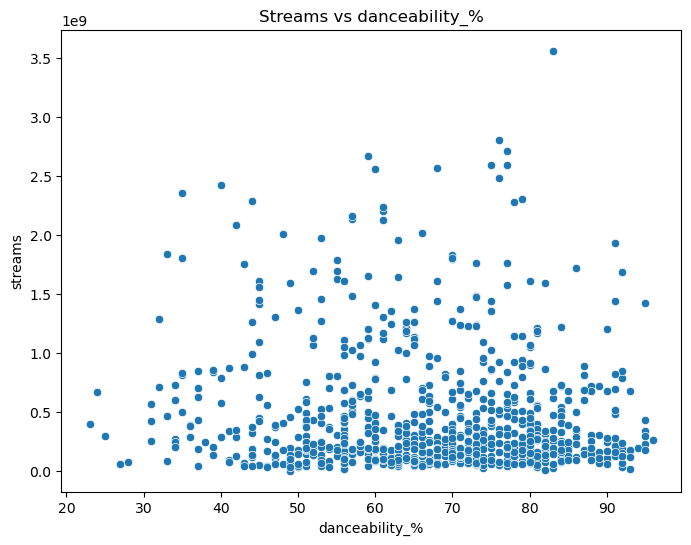

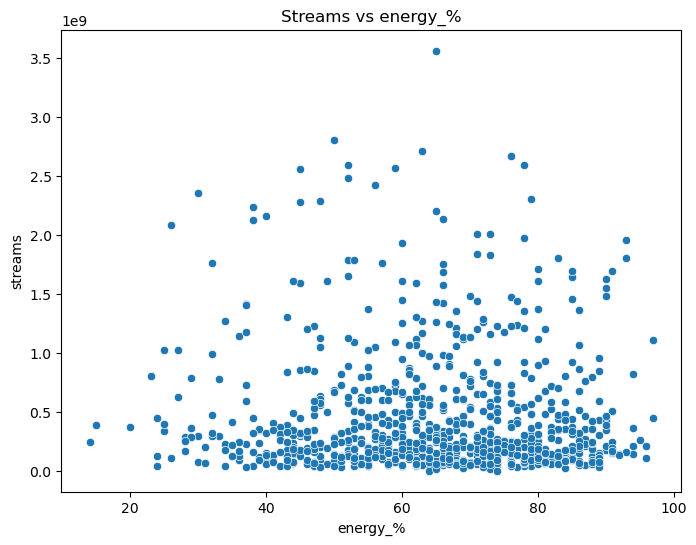

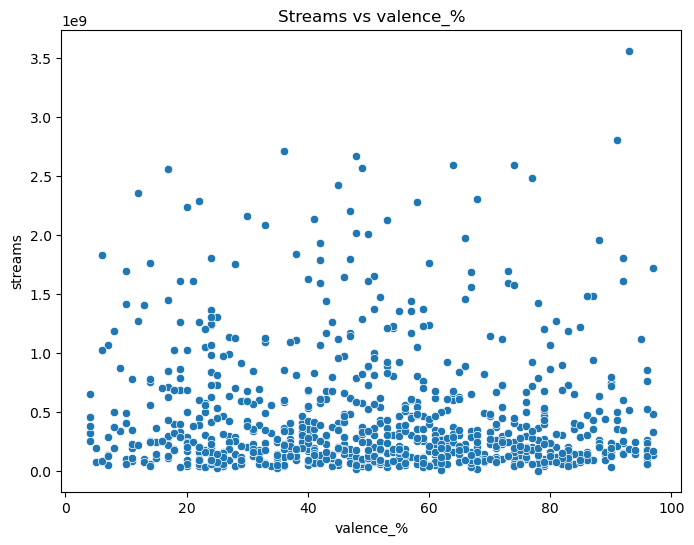

In [27]:
#Analyzing relationship between 'streams' and other numeric features
for col in ['danceability_%', 'energy_%', 'valence_%']:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=col, y='streams', data=df)
    plt.title(f'Streams vs {col}')
    plt.show()